Dataset shape: (8368, 17)


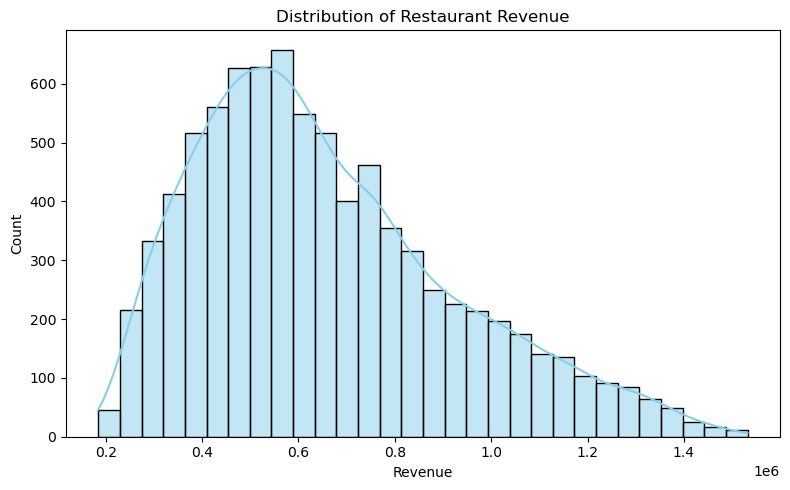

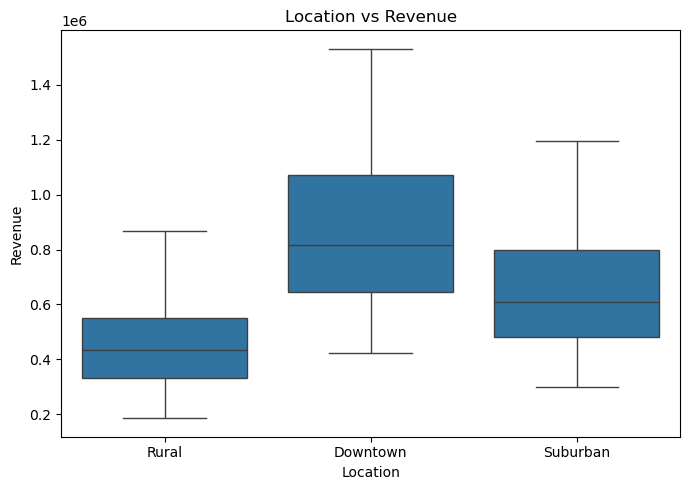

Categorical feature | Check distribution across categories visually. | Encode for modeling.
Comment: High potential impact; encode properly.
----------------------------------------------------------------------


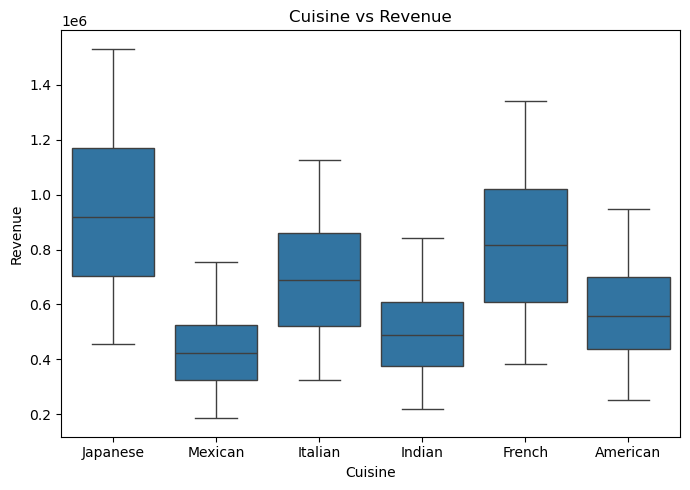

Categorical feature | Check distribution across categories visually. | Encode for modeling.
Comment: High potential impact; encode properly.
----------------------------------------------------------------------


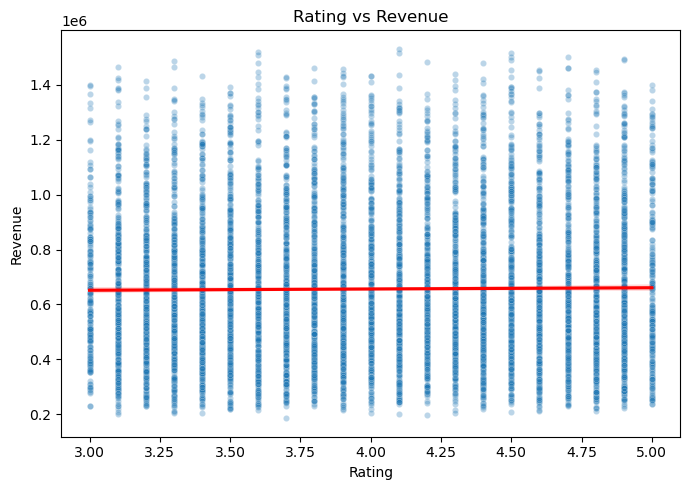

Numeric feature | Correlation with Revenue: 0.010 | Mutual information: 0.002
Comment: Low linear correlation; may still have nonlinear effect, keep for now.
----------------------------------------------------------------------


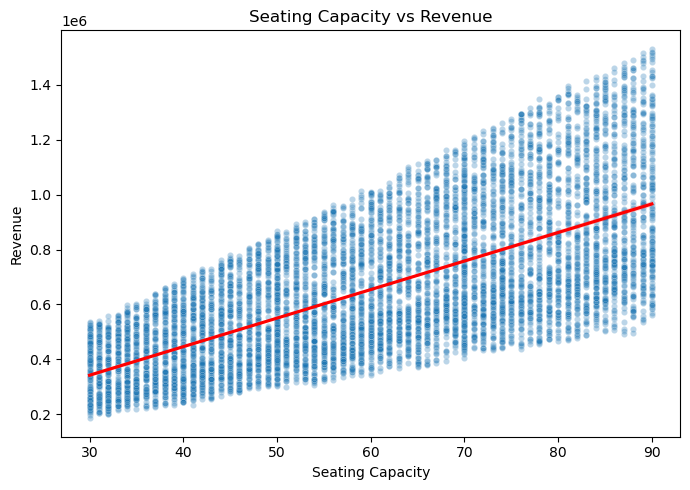

Numeric feature | Correlation with Revenue: 0.677 | Mutual information: 0.479
Comment: Strong correlation; key numeric feature.
----------------------------------------------------------------------


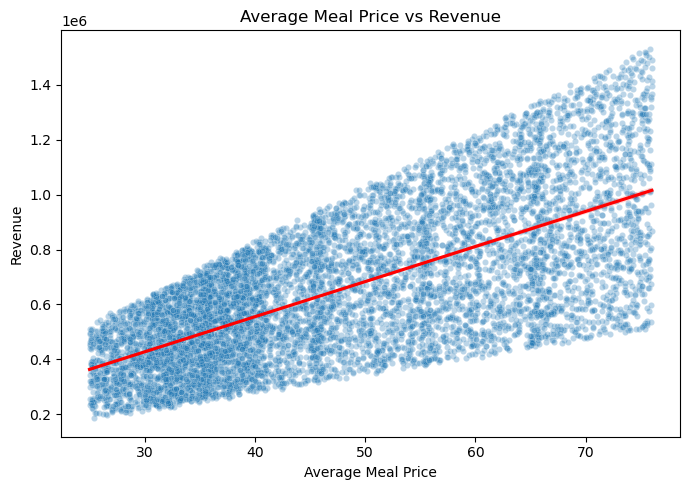

Numeric feature | Correlation with Revenue: 0.686 | Mutual information: 0.475
Comment: Strong correlation; key numeric feature.
----------------------------------------------------------------------


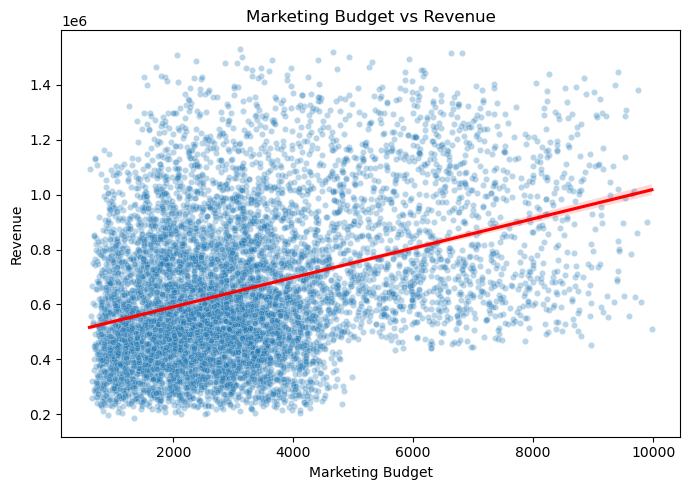

Numeric feature | Correlation with Revenue: 0.365 | Mutual information: 0.102 | Skewed (skew=1.13) → consider log-transform
Comment: Moderate correlation; supportive feature.
----------------------------------------------------------------------


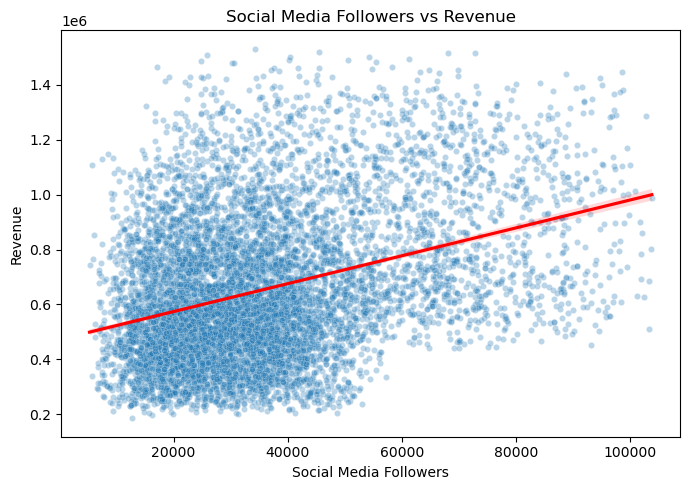

Numeric feature | Correlation with Revenue: 0.354 | Mutual information: 0.085 | Skewed (skew=1.08) → consider log-transform
Comment: Moderate correlation; supportive feature.
----------------------------------------------------------------------


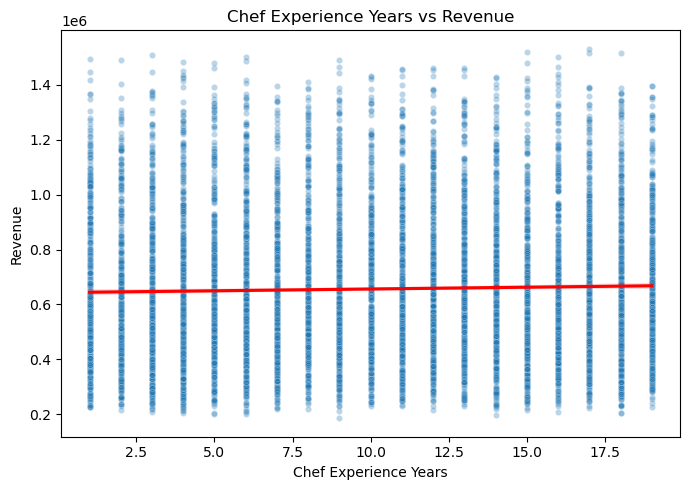

Numeric feature | Correlation with Revenue: 0.027 | Mutual information: 0.004
Comment: Low correlation; may be useful in tree-based models.
----------------------------------------------------------------------


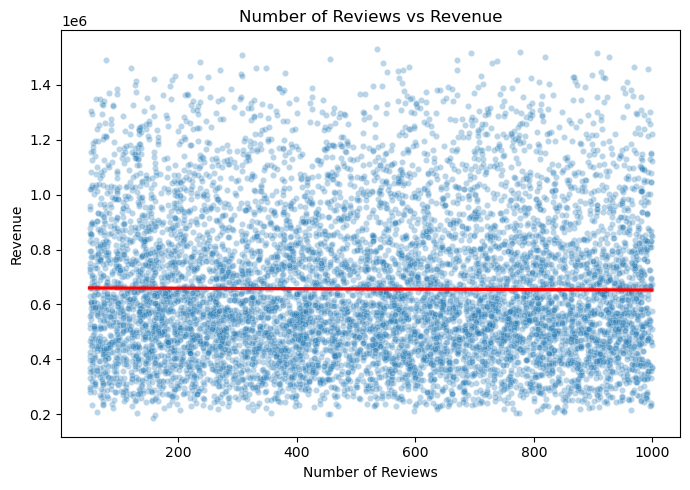

Numeric feature | Correlation with Revenue: -0.008 | Mutual information: 0.004
Comment: Low correlation; keep for now.
----------------------------------------------------------------------


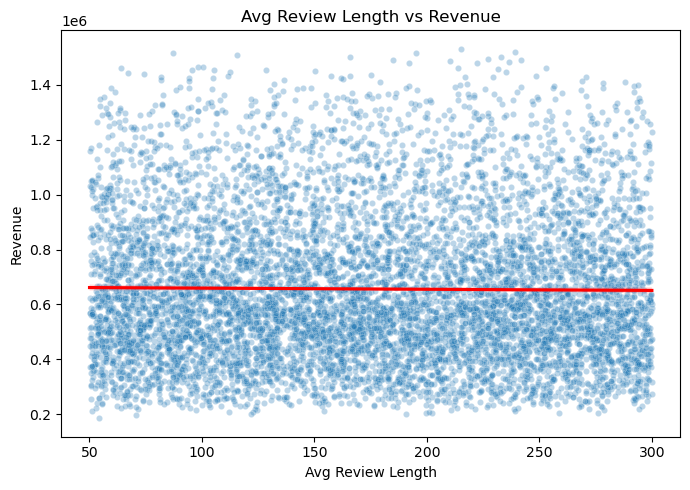

Numeric feature | Correlation with Revenue: -0.011 | Mutual information: 0.001
Comment: Negligible linear impact; keep for now.
----------------------------------------------------------------------


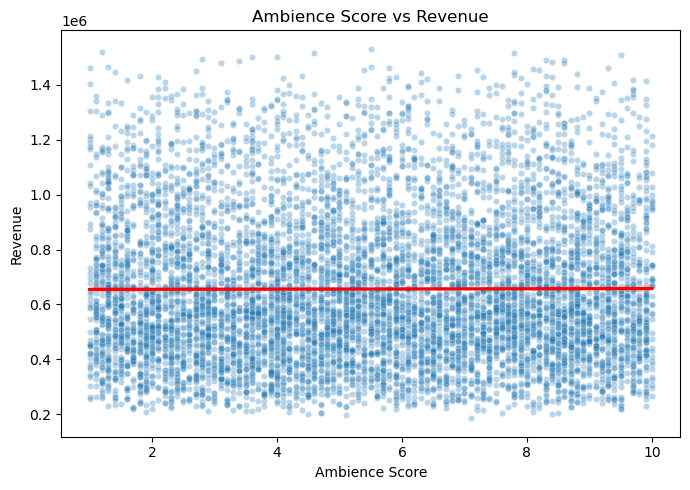

Numeric feature | Correlation with Revenue: 0.003 | Mutual information: 0.005
Comment: Negligible linear impact; keep for now.
----------------------------------------------------------------------


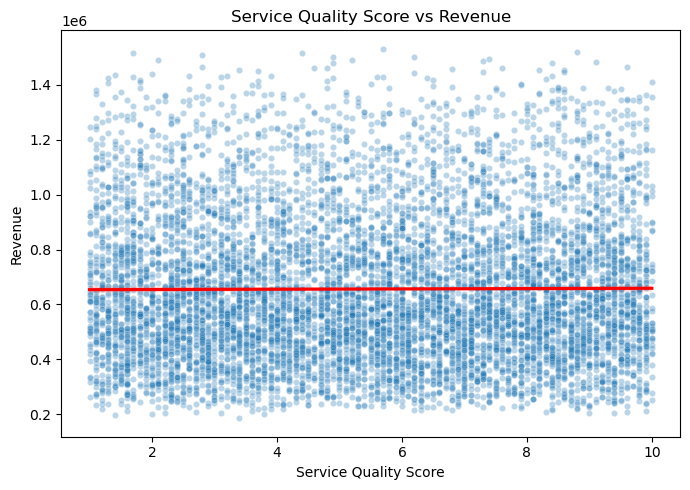

Numeric feature | Correlation with Revenue: 0.005 | Mutual information: 0.000
Comment: Negligible linear impact; keep for now.
----------------------------------------------------------------------


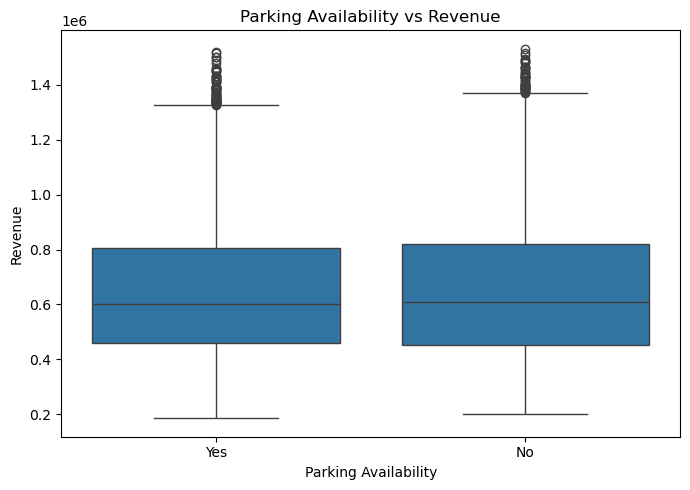

Categorical feature | Check distribution across categories visually. | Encode for modeling.
Comment: Minimal impact; may be useful in combination with other features.
----------------------------------------------------------------------


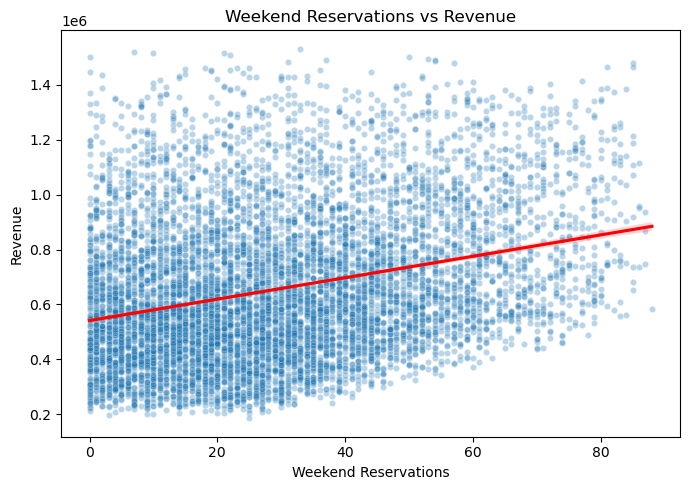

Numeric feature | Correlation with Revenue: 0.292 | Mutual information: 0.076
Comment: Moderate correlation; supportive feature.
----------------------------------------------------------------------


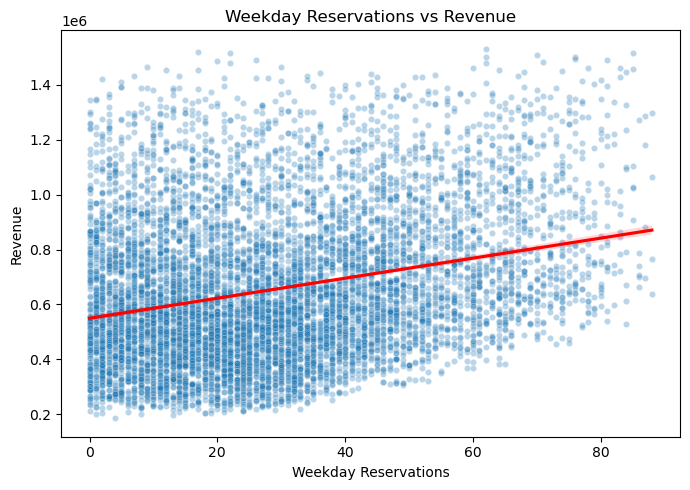

Numeric feature | Correlation with Revenue: 0.273 | Mutual information: 0.054
Comment: Moderate correlation; supportive feature.
----------------------------------------------------------------------

Columns after dropping identifier: Index(['Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')
Skewness of Revenue before transform: 0.74


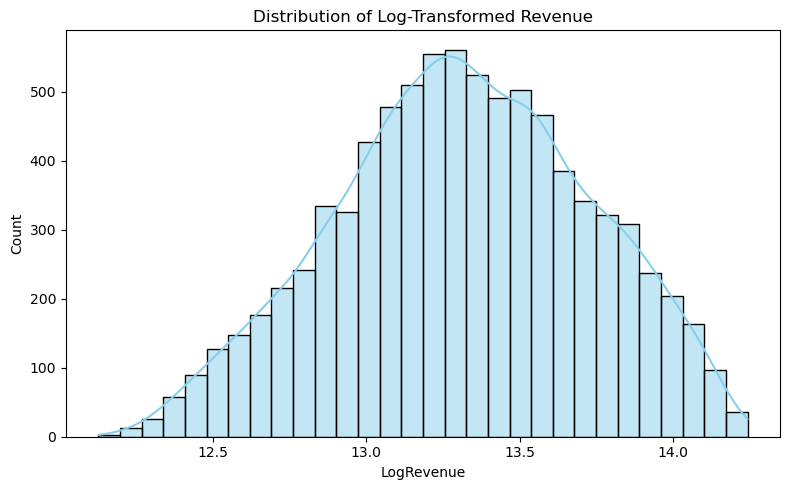

Skewness of Revenue after log-transform: -0.11


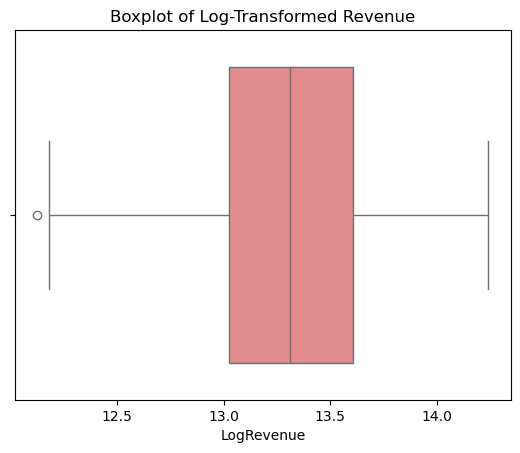

Number of rows removed as outliers: 0
Skewed numeric features: ['Marketing Budget', 'Social Media Followers']
Non-skewed numeric features: ['Rating', 'Seating Capacity', 'Average Meal Price', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations']
Transformed train shape: (6694, 20)
Transformed test shape: (1674, 20)


In [18]:
# ========================
# 0. Import libraries
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from scipy.stats import zscore

# ========================
# 1. Load dataset
# ========================
df = pd.read_csv("restaurant_data.csv")
print("Dataset shape:", df.shape)

# ========================
# 2. Visualize target
# ========================
plt.figure(figsize=(8,5))
sns.histplot(df["Revenue"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Restaurant Revenue")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ========================
# 3. Compute mutual information for numeric features
# ========================
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove("Revenue")  # remove target

X_numeric = df[numeric_cols]
y = df["Revenue"]

mi_scores = mutual_info_regression(X_numeric, y, random_state=42)
mi_dict = dict(zip(numeric_cols, mi_scores))

# ========================
# 4. Column visualization and commentary function
# ========================
target = "Revenue"

def plot_and_comment(df, column_name, target, comment=None):
    plt.figure(figsize=(7,5))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        sns.scatterplot(x=df[column_name], y=df[target], alpha=0.3, s=20)
        sns.regplot(x=df[column_name], y=df[target], scatter=False, color='red')
        corr = df[column_name].corr(df[target])
        mi = mi_dict.get(column_name, np.nan)
        explanation = (f"Numeric feature | Correlation with {target}: {corr:.3f} | "
                       f"Mutual information: {mi:.3f}")
        skewness = df[column_name].skew()
        if abs(skewness) > 1:
            explanation += f" | Skewed (skew={skewness:.2f}) → consider log-transform"
    else:
        sns.boxplot(x=df[column_name], y=df[target])
        explanation = "Categorical feature | Check distribution across categories visually. | Encode for modeling."
    
    plt.title(f"{column_name} vs {target}")
    plt.xlabel(column_name)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()
    
    print(explanation)
    if comment:
        print("Comment:", comment)
    print("-"*70)

# ========================
# 5. Analyze each column
# ========================
columns_to_plot = [
    "Location", "Cuisine", "Rating", "Seating Capacity",
    "Average Meal Price", "Marketing Budget", "Social Media Followers",
    "Chef Experience Years", "Number of Reviews", "Avg Review Length",
    "Ambience Score", "Service Quality Score", "Parking Availability",
    "Weekend Reservations", "Weekday Reservations"
]

comments = [
    "High potential impact; encode properly.",
    "High potential impact; encode properly.",
    "Low linear correlation; may still have nonlinear effect, keep for now.",
    "Strong correlation; key numeric feature.",
    "Strong correlation; key numeric feature.",
    "Moderate correlation; supportive feature.",
    "Moderate correlation; supportive feature.",
    "Low correlation; may be useful in tree-based models.",
    "Low correlation; keep for now.",
    "Negligible linear impact; keep for now.",
    "Negligible linear impact; keep for now.",
    "Negligible linear impact; keep for now.",
    "Minimal impact; may be useful in combination with other features.",
    "Moderate correlation; supportive feature.",
    "Moderate correlation; supportive feature."
]

for col, com in zip(columns_to_plot, comments):
    plot_and_comment(df, col, target, com)

# ========================
# 6. Drop identifier column
# ========================
df = df.drop(columns=["Name"])
print("\nColumns after dropping identifier:", df.columns)

# ========================
# 7. Log-transform target
# ========================
print(f"Skewness of Revenue before transform: {df['Revenue'].skew():.2f}")
df["LogRevenue"] = np.log1p(df["Revenue"])
target = "LogRevenue"

plt.figure(figsize=(8,5))
sns.histplot(df["LogRevenue"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Log-Transformed Revenue")
plt.xlabel("LogRevenue")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print(f"Skewness of Revenue after log-transform: {df['LogRevenue'].skew():.2f}")

sns.boxplot(x=df["LogRevenue"], color='lightcoral')
plt.title("Boxplot of Log-Transformed Revenue")
plt.show()

# ========================
# 8. Outlier removal
# ========================
# no outlier here use Z score since logRevenue is considered normal
z_scores = zscore(df["LogRevenue"])
df_clean = df[np.abs(z_scores) < 3]
removed_rows = df.shape[0] - df_clean.shape[0]
print(f"Number of rows removed as outliers: {removed_rows}")

# ========================
# 9. Train/test split
# ========================
X = df_clean.drop(columns=["Revenue", "LogRevenue"])
y = df_clean["LogRevenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 10. Identify numeric and categorical columns
# ========================
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# ========================
# 11. Handle skewed numeric features
# ========================
skewness = X_train[numeric_cols].skew()
skewed_cols = skewness[abs(skewness) > 1].index.tolist()
non_skewed_cols = [c for c in numeric_cols if c not in skewed_cols]

print("Skewed numeric features:", skewed_cols)
print("Non-skewed numeric features:", non_skewed_cols)

# ========================
# 12. Define numeric transformer (simplified)
# ========================
log_pipeline = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

numeric_transformer = ColumnTransformer(transformers=[
    ("log_scaled", log_pipeline, skewed_cols),
    ("scaled_only", StandardScaler(), non_skewed_cols)
])

# ========================
# 13. Define categorical transformer
# ========================
ohe_cols = [col for col in categorical_cols if X_train[col].nunique() < 10]
target_enc_cols = [col for col in categorical_cols if col not in ohe_cols]

categorical_transformer = ColumnTransformer(transformers=[
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), ohe_cols),
    ("target_enc", TargetEncoder(), target_enc_cols)
])

# ========================
# 14. Combine pipelines
# ========================
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

